# Google Trends analytics using Python
- Here we will be analyzing the Google search trends on the queries of our intered {You will get a chance to provide input}.

In [ ]:
#!pip install pytrends

***Start with importing libraries.***
---
*Probably need to run "pip install pytrends"*

In [231]:
# import necessary libaries
import pandas as pd
import numpy as np

from pytrends.request import TrendReq

import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset

import warnings
warnings.filterwarnings("ignore")

import re
from textblob import TextBlob
from wordcloud import WordCloud

from spacy.lang.en.stop_words import STOP_WORDS as en_stop #stopwords in English
from spacy.lang.da.stop_words import STOP_WORDS as da_stop #stopwords in Danish
final_stopwords= en_stop.union(da_stop)

# Connect to Google
- The first step after installation is to connect Pytrends to Google Trends so that WE can send a request and get the information WE need.
---
The TrendReq receives two important parameters; hl & tz.

hl stands for hosting language for accessing Google Trends; in this example, we set English.

tz stands for timezone

In [130]:
#write function to google trends
def google_trend():
  # Configuring connection
  trends = TrendReq(hl='en-US', tz= 360, timeout=(10,25))
  return trends

# Build Payload
> The build_payload method from Pytrends is used to build a list of keywords that want to search in Google Trends. Can also specify the timeframe to gather data and the category to query the data from.
---
*kw_list:* list of the target search terms 

*cat:* Category to narrow result fx. Art, Entertainment.[link for category](https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories)

*timeframe:* Date to start from fx. Defaults to last 5yrs is 'today 5-y' or Everything is 'all'

*geo:* Location of interest represent by two letter country abbreviation fx. United States is 'US' or Defaults to World

*gprop:* What Google property to filter to fx. "image" or "news" default to web searches

In [137]:
# Build the playload
def gt_playload():
  kw_list = ["Healthy diet"]  # list of keywords to get data 
  input= f'you have entered {kw_list}'
  
  #playload
  trends= google_trend()
  trends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo= '', gprop='') #timeframe='today 5-y'
  
  # lets check if we got the data from google or not?
  return trends

gt_playload()

# What kind of data want to pull? possible methods are:
- ***Interest Over Time:*** returns historical, indexed data for when the keyword was searched
- Historical Hourly Interest:  returns historical, indexed, hourly data for when the keyword was searched
- ***Interest by Region:*** returns data for where the keyword is most searched
- Related Topics: returns data for the related keywords to a provided keyword
- Related Queries: returns data for the related keywords to a provided keyword
- ***Trending Searches:*** returns data for latest trending searches
- Top Charts: returns the data for a given topic
- Suggestions: returns a list of additional suggested keywords that can be used to refine a trend search.

In [216]:
# Function to Disply in the figure
def displayfig(x, y, title, x_label, y_label):
    """ The function will take x & value including title, x_label & y_label then display the figure"""
    plt.figure(figsize= (10, 5))
    plt.plot(x,y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

def display_barplot(df, x_col, height_col, title):
  plt.figure(figsize=(10, 5))
  plt.title(title, fontsize=12)
  plt.bar(df[x_col], df[height_col], color ='blue', width = 0.4)#{"Neutral": "blue", "Negetive": "red", "Positive": "green"}
  plt.xticks(rotation=20)
  plt.xlabel(x_col)
  plt.ylabel(height_col)
  plt.show()

***Interest Over Time***

,date,Healthy diet
47,2022-08-21,73
48,2022-08-28,81
49,2022-09-04,80
50,2022-09-11,85
51,2022-09-18,87


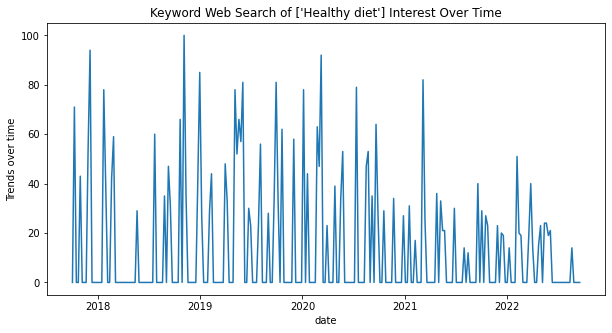

In [182]:
# function to extract interest over time
def gt_trends_over_time():
  trends=gt_playload()
  # Interest Over Time
  data_over_time= trends.interest_over_time().drop(columns='isPartial')
  data_over_time = data_over_time.reset_index()
  return data_over_time.tail()

display(gt_trends_over_time())

# Disply in the figure
displayfig(x=data_over_time["date"], y=data_over_time.iloc[:, 1], title= "Keyword Web Search of {kw_list} Interest Over Time".format(kw_list=kw_list), x_label= "date", y_label="Trends over time")

**Historical Hourly Interest**

,date,Healthy diet,isPartial
0,2022-09-01 00:00:00,69,False
1,2022-09-01 01:00:00,39,False
2,2022-09-01 02:00:00,22,False
3,2022-09-01 03:00:00,24,False
4,2022-09-01 04:00:00,29,False
...,...,...,...
575,2022-09-24 20:00:00,57,False
576,2022-09-24 21:00:00,63,False
577,2022-09-24 22:00:00,58,False
578,2022-09-24 23:00:00,64,False


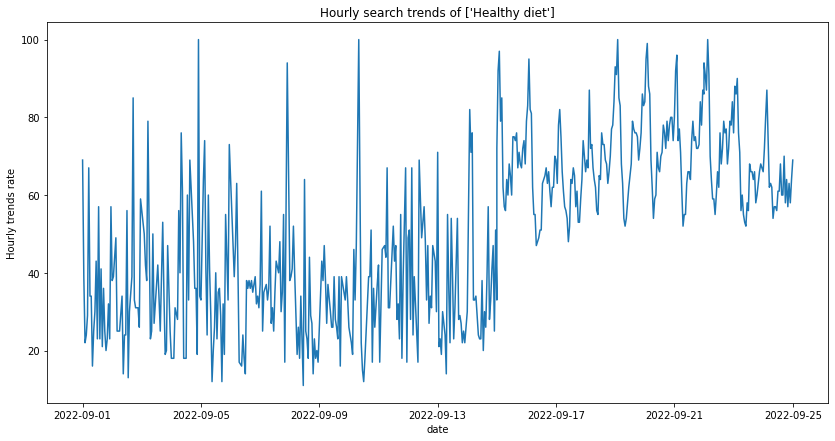

In [147]:
# Function for Historical hourly interest
def gt_hh_trends():
  trends= gt_playload()
  # Historical Hourly Interest (The hourly interest of the keyword)
  hourly_trends= trends.get_historical_interest(kw_list, year_start=2022, month_start=9, day_start=1, hour_start=0, year_end=2022, month_end=9, day_end=25, hour_end=0, cat=0, sleep=0)
  hourly_trends = hourly_trends.reset_index()
  return hourly_trends[hourly_trends["Healthy diet"]> 0]

display(gt_hh_trends())

# Disply in the figure
hourly_trends= gt_hh_trends()
plt.figure(figsize= (14, 7))
plt.plot(hourly_trends["date"], hourly_trends.iloc[:, 1])
plt.title("Hourly search trends of {kw_list}".format(kw_list=kw_list))
plt.xlabel("date")
plt.ylabel("Hourly trends rate")
plt.show()


**Interest by Region(Search by geographical region)**

To show you which countries search the keyword on a scale of 0 to 100, where 100 represents a country with the most search

*The resolution value is dependent on the geo parameter of the common configuration:*

*Use resolution='COUNTRY' for geo='World'*

*Use resolution='REGION' for geo='US', Two letter country abbreviation. for example*

*gprop= What Google property to filter to.Can be `images, news, youtube or froogle`*

,geoName,Healthy diet
0,Fiji,100
1,Belize,41
2,Malta,39
3,Philippines,38
4,Bhutan,38
5,Maldives,36
6,Bahamas,32
7,Guyana,31
8,Brunei,30
9,Trinidad & Tobago,26


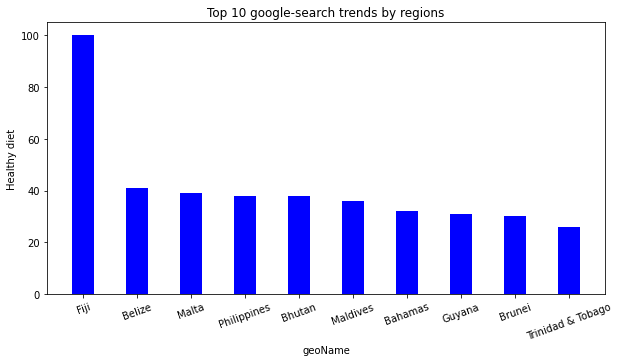

In [217]:
# Function for interest by region
def gt_trends_byregion():
  trends= gt_playload()
  # resolution can be either CITY, COUNTRY or REGION
  trends_by_region= trends.interest_by_region(resolution= 'COUNTRY', inc_low_vol=True, inc_geo_code=False)
  trends_by_region = trends_by_region.sort_values(by=kw_list, ascending=False).reset_index() #.sort_values('Likes', ascending=False, ignore_index=True)
  return trends_by_region.head(10)

df_byregion= gt_trends_byregion()
display(df_byregion)

display_barplot(df_byregion, "geoName", "Healthy diet", "Top 10 google-search trends by regions")

**Related Queries**

In [271]:
#function for releted queries
def gt_related_queries():
  trends= gt_playload()
  # Related Queries (keywords that are closely tied to a primary keyword of the choice)
  related_queries= trends.related_queries()
  return related_queries[kw_list[0]]['top']

releted_query=gt_related_queries()
releted_query.head()

,query,value
0,healthy food,100
1,what is healthy diet,99
2,food,99
3,healthy food diet,99
4,what is diet,99


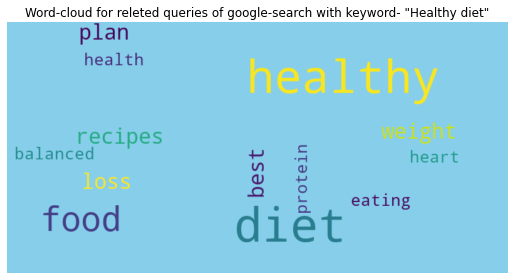

In [279]:
def cleanText(text):
      text= re.sub(r'@[A-Za-z0-9]+', '',text) # Removed @mentions
      text= re.sub(r'#', '',text) # the '#' symbol
      text= re.sub(r':', '',text) # the ':' symbol
      text= re.sub(r'RT[\s]+', '',text) # Removed RT
      text= re.sub(r'https?:\/\/\s+', '',text) # Removed the hyper link
      return text
      
#Function for word-cloud
def wordcloud_plot(releted_query, title):
  #lets clean the xext first
  releted_query["query"]= releted_query["query"].apply(cleanText)
  # Create stopword list
  final_stopwords.update(['https', 'er', 'og', 't', 'co', 'A', 't','The'])
  plt.figure(figsize=(8,4))
  plt.title(title, fontsize=12)
  allWords= ' '.join( [twts for twts in releted_query["query"]] )
  wordcloud = WordCloud(stopwords=final_stopwords, max_words=100, width= 800, height=400, random_state=21, max_font_size= 75, background_color="skyblue").generate(allWords)
  plt.imshow(wordcloud, interpolation = "bilinear")
  plt.axis('off')
  plt.tight_layout()
  plt.show()

wordcloud_plot(releted_query, f'Word-cloud for releted queries of google-search with keyword- "{kw_list[0]}"')

**Trending topics of the year**

In [ ]:
# Trending topics of the year
df= pd.DataFrame()

for year in range(2004, 2022):
    trending = trends.top_charts(year, hl= "en-US", geo= "GLOBAL")
    df[year]= trending.title
    
df.iloc[:, :9].head(5)

In [ ]:
df.iloc[:, 9:].head(5)

***Daily trends***
---
*Daily Search Trends highlights searchers that jumped significantly in traffic among all searches over the past 24 hours and update hourly.*
---
*These trends highlight specific queries that were searched, and an absolute number of searches made*


In [ ]:
# Get today´s trending topics
trendingtoday = trends.today_searches(pn='DK')
trendingtoday.head()
  

**Realtime Trends Searches in a Specific Country**
---
*It highlight stories that are trending across Google surfaces within the last 24 hours and are updated in real-time*

The "pn" argument specifies the geographical location, the US in our example.

In [ ]:
# Get realtime Google Trends data
trends_realtime= trends.trending_searches(pn='denmark')
trends_realtime.head(10)

#df = trends.realtime_trending_searches(pn='denmark')
#df.head(10)